# Chem/BioE C142/242 Spring 2024 - Tutorial 1

+ GSI: Eric Wang (ericwangyz@berkeley.edu)
+ Office Hours: **Tuesday 12-1 pm, Lewis 1**

## Outline:

* Visualizing univariate and multivariate functions
* Time your function
* Minimization using CG/BFGS 
* Golden section example

## Visualizing univariate and multivariate functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Prior to Matplotlib 3.2.0, you will have to explicitly import Axes3D
# to enable 3d plot
from mpl_toolkits.mplot3d import Axes3D

### Univariate function

$$f(x) = x^3 - 3x + 2$$

In [3]:
def func2d(x):
    f = x ** 3 - 3 * x + 2
    return f

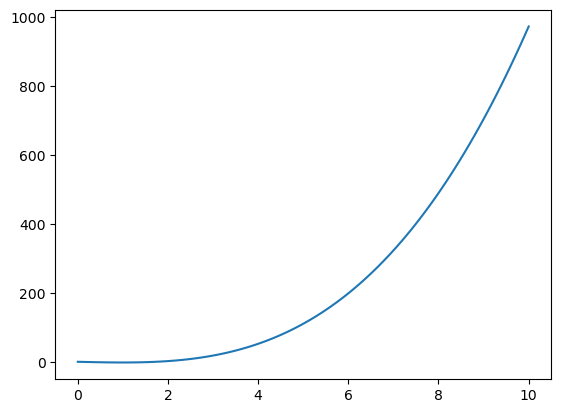

In [4]:
# to plot func
x = np.linspace(0, 10, 100)
y = func2d(x)
plt.plot(x, y)

### Multivariate function

$$f(x,y)=x^4-x^2+y^2-2xy-2$$

In [5]:
def func3d(x, y):
    return x ** 4 - x ** 2 + y ** 2 - 2 * x * y - 2

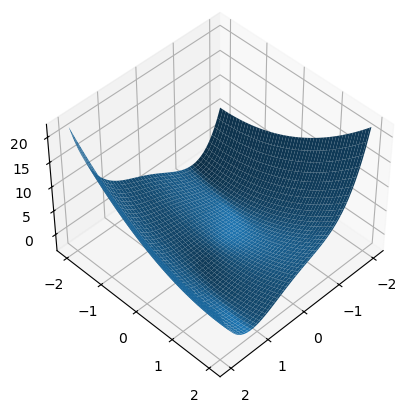

In [6]:
a = np.linspace(-2, 2, 100)
x, y = np.meshgrid(a, a) # generate x, y grid
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, func3d(x,y))
ax.view_init(45,45)

## Time your function

### With a magic method

In [7]:
def add(a, b):
    return a + b

%timeit add(1, 2)

56.5 ns ± 0.473 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


### With decorators

Decorators wrap a function, and modify its behavior.

In [8]:
import time

def timeit(f):

    def timed(*args, **kw):

        ts = time.time()
        result = f(*args, **kw)
        te = time.time()

        print(f'func:{f.__name__} took: {te-ts:.4f} sec')
        return result

    return timed

In [9]:
@timeit # equivalent to mysleep = timeit(mysleep)
def mysleep(sec):
    print("Sleeping...")
    time.sleep(sec)
    print("Wake up!")

mysleep(2)

Sleeping...
Wake up!
func:mysleep took: 2.0008 sec


## Minimization using CG/BFGS

The multivariate Rosenbrock function is given below:

$$f(\vec{x})=\sum_{i=1}^{N-1}100(x_{i+1}-x_i^2)^2+(1-x_i^2)^2$$

In [10]:
def rosenbrock(X):
    '''
    Rosenbrock function
    
    Parameters
    ----------
    X: np.ndarray
        Input values
    
    Returns
    -------
    y: float
        Output of Rosenbrock function with given X
    '''
    X2=X**2
    y = np.sum(100*(X[1:] - X2[:-1])**2 + (1 - X2[:-1])**2)
    return y


def test_rosenbrock():
    testX = np.array([1.0, 2.0])
    if rosenbrock(testX) == 100.0:
        print("Well done!")
    else:
        raise ValueError("Bad implementation")
        
test_rosenbrock()

Well done!


Use `x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])` as a starting porint and find minimum

In [11]:
from scipy.optimize import minimize

In [12]:
?minimize

Signature:
minimize(
    fun,
    x0,
    args=(),
    method=None,
    jac=None,
    hess=None,
    hessp=None,
    bounds=None,
    constraints=(),
    tol=None,
    callback=None,
    options=None,
)
Docstring:
Minimization of scalar function of one or more variables.

Parameters
----------
fun : callable
    The objective function to be minimized.

        ``fun(x, *args) -> float``

    where ``x`` is a 1-D array with shape (n,) and ``args``
    is a tuple of the fixed parameters needed to completely
    specify the function.
x0 : ndarray, shape (n,)
    Initial guess. Array of real elements of size (n,),
    where ``n`` is the number of independent variables.
args : tuple, optional
    Extra arguments passed to the objective function and its
    derivatives (`fun`, `jac` and `hess` functions).
method : str or callable, optional
    Type of solver.  Should be one of

        - 'Nelder-Mead' :ref:`(see here) <optimize.minimize-neldermead>`
        - 'Powell'      :ref:`(see here) <

More on optimization: [Scipy tutorial on optimization](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)

In [13]:
@timeit
def minimize_rosenbrock(x0, method):
    """
    Minimize Rosenbrock function
    
    Parameters
    ---------
    x0: np.ndarray
        Starting point
    method: str
        Method for minimization
    
    Returns
    ------
    res: OptimzizeResult
        Result object of scipy optimization
    """
    res = minimize(rosenbrock, x0, method=method, options={"gtol": 1e-5, "disp": True})
    return res

In [14]:
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])

In [15]:
res = minimize_rosenbrock(x0, "CG")
print(res.nit)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 43
         Function evaluations: 492
         Gradient evaluations: 82
func:minimize_rosenbrock took: 0.0330 sec
43


In [16]:
res = minimize_rosenbrock(x0, "BFGS")
print(res.nit)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 150
         Gradient evaluations: 25
func:minimize_rosenbrock took: 0.0070 sec
21


## Golden section example

Given the following function, can you find its minimum value in range $[0,9]$ using golden section?

In [17]:
def func(x):
    isarray = type(x) is np.ndarray
    coefs = np.array([
        8.0013714770, -24.06731415,  37.07604400, 0.0000000000, -43.86909846,
        44.427011010, -22.01262040,  6.536434989, -1.248082478, 0.157159012, 
        -0.012990941,  0.000678657, -2.03269E-05, 2.66065E-07
    ])
    base = np.zeros((len(x) if isarray else 1, 14))
    for i in range(1, 14):
        base[:,i] += x ** i
    result = base.dot(coefs)
    return result if isarray else np.sum(result)

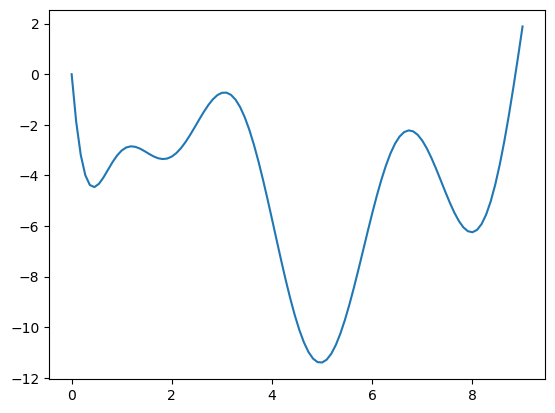

In [18]:
x = np.linspace(0, 9, 100)
plt.plot(x, func(x))

In [19]:
def golden_section(func, start, end, reference, tol):
    if end - start < tol:
        return {'x':reference, 'y':func(reference)}
    else:
        if reference - start < end - reference:
            new_reference = end - (end - reference) * 0.618
            if func(new_reference) > func(reference):
                return golden_section(func, start, new_reference, reference, tol)
            else:
                return golden_section(func, reference, end, new_reference, tol)
        else:
            new_reference = start + (reference - start) * 0.618
            if func(new_reference) > func(reference):
                return golden_section(func, new_reference, end, reference, tol)
            else:
                return golden_section(func, start, reference, new_reference, tol)

In [20]:
golden_section(func, 0, 9, 9*0.618, 1e-5)

{'x': 4.9642569571739665, 'y': -11.400276695178036}